# The Epistemology of Deep Learning
## Week 3: Optimization and Overfitting

As our discussion of the XOR problem served to illustrate, multi-layer neural networks are capable of expressing a much wider range of patterns in the data than their single-layer counterparts. To further illustrate the point, we will implement a multi-layer neural network that will be used to identify the numerals depicted by the images in the MNIST database.  

### A Deep Neural Network for Recognizing MNIST Images

The simple, single-layer neural network that we implemented performed reasonably well at the task of identifying the handwritten digits depicted by the images in the MNIST database (~75% accuracy on the testing set of images). If, however, we wish to improve the overall performance of the network, we must consider what factors were most responsible for limiting its accuracy.

Recall that in that simple neural network, the value of the $i^{\mathrm{th}}$ neuron in the output layer is computed by taking a weighted average of the values of the input neurons:
$$ 
    o_i = \sum_{j=0}^{N_0-1} v_j w_{ji} 
$$
This means, in effect, that the only functional dependencies between the inputs and the outputs that the network can discover are those with a linear form. Thus, in training the network, we are essentially performing a linear regression. We are utilizing the method of gradient descent as a means of drawing a best-fit line (or, in this case, a multi-dimensional hyperplane) through the data. Given this fact, it is perhaps surprising that the model should have been able to predict the digits as accurately as it did. For there is no reason to think that the true function relating the grayscale pixel weights in an image to the digit displayed is even approximately linear in form. Accordingly, if we wish to improve the accuracy of our predictions, we ought to use a more sophisticated neural network that is capable of discovering at least some *non-linear* functional dependencies that may exist between the inputs and the outputs. 

To this end, we will introduce into the network a third "hidden" layer of neurons, interposed between its input and output layers. As before, the network will be fully connected in the sense that every neuron in the input layer will be connected to every neuron in the hidden layer, and every neuron in the hidden layer will, in turn, be connected to every neuron in the output layer. The graph of such a fully connected 3-layer neural network is pictured below:

![nn_deep](../assets/images/mnist/nn_deep.png)

To describe the behavior of this sort of network more precisely, we will extend the notation that we used to describe the simple single-layer network as follows:

1. The network's input layer will be referred to as layer $0$, the hidden layer will be referred to as layer $1$, and the output layer will be referred to as layer $2$. 
2. For $i=0,1,2$, $N_i$ is the number of neurons in layer $i$ . 



3. For $t=0,\ldots,T-1$ and $i=0,1$, $w^{i,t}$ is the matrix:

$$
\begin{bmatrix}
w^{i,t}_{00} & w^{i,t}_{01} & \cdots & w^{i,t}_{0(N_{i+1}-1)}\\
w^{i,t}_{10} & w^{i,t}_{11} & \cdots & w^{i,t}_{1(N_{i+1}-1)}\\
\vdots & \vdots & \ddots & \vdots\\
w^{i,t}_{(N_i-1)0} & w^{i,t}_{(N_i-1)1} & \cdots & w^{i,t}_{(N_i-1)(N_{i+1}-1)}\\
\end{bmatrix}
$$ 

where $w^{i,t}_{jk}$ is the weight of the link connecting the $j^{\mathrm{th}}$ neuron in layer $i$ to the $k^{\mathrm{th}}$ neuron in layer $i+1$, at the point at which the network is about to be trained on the $t^{\mathrm{th}}$ training input.

How are the inputs propagated through the network? The obvious answer is to propagate the inputs through the two layers of the network successively. This means that we first compute the values of the neurons in the hidden layer by taking weighted averages of the values of the neurons in the input layer. Then, we compute the values of the neurons in the output layer by taking weighted averages of the values of the neurons in the hidden layer. Formally, if $o^{i,t} = [o^{i,t}_0,\ldots, o^{t}_{N_i-1}]$, where $o^{i,t}_j = $ the value assigned to the $j^{\mathrm{th}}$ neuron in layer $i$ by propagating the $t^{\mathrm{th}}$ training input through the network, then (i) $o^{0,t} = v^t$ and (ii) for $i=0,1$: $o^{i+1,t} = o^{i,t}\cdot w^{i,t}$, i.e.:
$$ 
    o^{0,t}_i = v^t_i 
$$

$$ 
    o^{1,t}_i = \sum_{j=0}^{N_0-1} o^{0,t}_j w^{0,t}_{ji} = \sum_{j=0}^{N_0-1} v^t_j w^{0,t}_{ji} 
$$

$$
o^{2,t}_i = \sum_{j=0}^{N_1-1} o^{1,t}_j w^{1,t}_{ji} = \sum_{j=0}^{N_1-1}\left(\sum_{k=0}^{N_0-1} v^t_k w^{0,t}_{kj}\right) w^{1,t}_{ji} 
$$
Note that this last equation, relating the values of the output neurons to those of the input neurons, can be rewritten:
$$
\begin{eqnarray}
o^{2,t}_i &=& \sum_{j=0}^{N_1-1}\left(\sum_{k=0}^{N_0-1} v^t_k w^{0,t}_{kj}\right) w^{1,t}_{ji} \\
          &=& \sum_{j=0}^{N_1-1}\left(\sum_{k=0}^{N_0-1} v^t_k w^{0,t}_{kj}w^{1,t}_{ji}\right) \\
          &=& \sum_{k=0}^{N_0-1}\left(\sum_{j=0}^{N_1-1} v^t_k w^{0,t}_{kj}w^{1,t}_{ji}\right) \\
          &=& \sum_{k=0}^{N_0-1}v^t_k\left(\sum_{j=0}^{N_1-1} w^{0,t}_{kj}w^{1,t}_{ji}\right) \\
\end{eqnarray}
$$
Thus, this equation is still of the form:
$$
o^{2,t}_i = \sum_{k=0}^{N_0-1}v^t_k\lambda_k
$$
In other words, the neural network can still only express linear functional dependencies between the input and output neurons: weighted averages of weighted averages are still just weighted averages. Thus, without altering the propagation algorithm, a neural network with multiple interior layers can still only perform linear regressions. So, how do we introduce non-linearity into the propagation algorithm? One standard way to do so is to introduce a "propagation threshold" for some of the neurons in the network. If the value of a neuron falls below this threshold, then it will fail to fire, i.e., its value will cease to propagate through the network (similar threshold effects characterize the production of so-called action potentials by neurons in the brain). For example, let us stipulate that a neuron in the hidden layer will only propagate its value to the neurons in the output layer provided this value is greater than zero. In mathematical terms, this means that before we compute the values of the neurons in the output layer by taking weighted averages of the values of the neurons in the hidden layer, we will first replace these values with the result of applying to each, the following function:

$$ 
\begin{eqnarray}
f(x) = \max(0,x) = \left\{ \begin{array}{ll} x & \mathrm{if\, } x > 0\\
0 & \mathrm{otherwise}\end{array}\right.
\end{eqnarray}
$$

(In the deep learning literature this function is referred to as "ReLU", which stands for rectified linear unit.) 

In [36]:
def relu(x):
    """Rectified Linear Unit (ReLU). Used to produce a non-linear threshold effect in the network"""
    return x if (x > 0) else 0 

relu = np.vectorize(relu) #IGNORE THIS LINE

Applying this threshold effect, the propagation of values from the hidden layer to the output layer of the network is now defined by the equation:
$$
o^{2,t}_i = \sum_{j=0}^{N_1-1} f\left(o^{1,t}_j\right) w^{1,t}_{ji} = \sum_{j=0}^{N_1-1}f\left(\sum_{k=0}^{N_0-1} v^t_k w^{0,t}_{kj}\right) w^{1,t}_{ji} 
$$
A little later, we will consider what kinds of functional dependencies can be captured by the network, but for now, we simply note that these dependencies need no longer be linear.  

### Gradient Descent in a Multi-Layer Network


As was the case with the simple single-layer network, we will train the network by successively feeding each training input to the network, compare the output to the corresponding training target, and update the weights in accordance with the method of gradient descent. While the general method is the same as before, since the network now has a more complicated architecture, the details of are somewhat more involved:  

1. **Propagate the $t^{\mathrm{th}}$ training input through the network.** As discussed above, inputs are propagated through the network in accordance with the following equations:
$$ 
\begin{eqnarray}
    o^{0,t} &=& v^t \\ 
    o^{1,t} &=& o^{0,t}\cdot w^{0,t} \\ 
    o^{2,t} &=& f\left(o^{1,t}\right)\cdot w^{1,t}
\end{eqnarray}
$$
Here, and in what follows, if $v$ is the vector $[v_0,\ldots,v_n]$, then $f(v)$ is the vector that results from the elementwise application of $f$ to $v$, i.e., $f(v) = [f(v_{0}),\ldots,f(v_n)]$.  

In [37]:
def propagate(weights, inputs):  # NOTE: weights is a 2-length array (weights[i] (i = 0,1) stores the weights connecting layers i and i+1).
    """Propagate inputs through the deep neural network"""
    layers = []
    # First, set the values of the neurons in layer 0 to the input values
    layers.insert(0, inputs)
    # Next, compute the values of the neurons in layer 1 by taking weighted averages.
    layers.insert(1, np.dot(layers[0], weights[0]))
    # Finally, compute the values of the neurons in layer 2 by applying ReLU and then taking weighted averages
    layers.insert(2, np.dot(relu(layers[1]), weights[1]))        
        
    return layers # NOTE: layers is now a 3-length array (layers[i] (i = 0,1,2) stores the values of the neurons in layer i).

2. **Measure the degree of deviation (or "error") of the outputs from the corresponding training target**. As before, we will measure error by the mean-squared deviation from the target:
$$
E(o^{2,t}) = \frac{1}{N_2}(o^{2,t} - l^t)^2 = \frac{1}{N_2}\sum_{i=0}^{N_2-1} (o^{2,t}_i - l^t_i)^2
$$

3. **Adjust the network weights by some amount in the opposite direction of the gradient of the loss function.** To carry out this step, we must compute the $w^{i,t}_{jk}$-component of the gradient of the error function $E$, for each of the weights in the network. We will first do so for the weights connecting the neurons in layer 1 to those in layer 2, i.e., to weights of the form $w^{1,t}_{ij}$. The partial derivative of $E$ with respect to $w^{1,t}_{ij}$ is given by:

$$
\begin{eqnarray}
    \frac{\partial E}{\partial w^{1,t}_{ij}} &=& \frac{\partial}{\partial w^{1,t}_{ij}}\left\{\frac{1}{N_2}\sum_{n=0}^{N_2-1} (o^{2,t}_n - l^t_n)^2\right\} \\
                                        &=& \frac{\partial}{\partial w^{1,t}_{ij}}\left\{\frac{1}{N_2}\sum_{n=0}^{N_2-1} \left(\left(\sum_{m=0}^{N_1-1} f(o^{1,t}_m) w^{1,t}_{mn}\right) - l^t_n\right)^2\right\} \\
                                        &=& \frac{\partial}{\partial w^{1,t}_{ij}}\left\{\frac{1}{N_2}\left(\left(\sum_{m=0}^{N_1-1} f(o^{1,t}_m) w^{1,t}_{mj}\right) - l^t_j\right)^2\right\}\\
                                        &=& \frac{2f(o^{1,t}_i)}{N_2}\left(\left(\sum_{m=0}^{N_1-1} f(o^{1,t}_m) w^t_{mj}\right) - l^t_j\right) \\
                                        &=& \frac{2f(o^{1,t}_i)}{N_2}\left(o^{2,t}_j - l^t_j\right) \\
\end{eqnarray}
$$

Note that this is very similar to the equation for updating the weights in the simple 2-layer network, with the one exception that the quantity $(o^{2,t}-l^t)$ is not multipled by the value of the corresponding neuron, but rather by the image of this value under the function $f$. 

To update the weights connecting the neurons in the input layer to those in the hidden layer, we must compute the partial derivative of the loss function $E$ with respect to $w^{0,t}_{ij}$. This partial derivative is given by:
     $$
\begin{eqnarray}
    \frac{\partial E}{\partial w^{0,t}_{ij}} &=& \frac{\partial}{\partial w^{0,t}_{ij}}\left\{\frac{1}{N_2}\sum_{n=0}^{N_2-1} (o^{2,t}_n - l^t_n)^2\right\} \\
                                        &=& \frac{\partial}{\partial w^{0,t}_{ij}}\left\{\frac{1}{N_2}\sum_{n=0}^{N_2-1} \left(\left(\sum_{m=0}^{N_1-1} f(o^{1,t}_m) w^{1,t}_{mn}\right) - l^t_n\right)^2\right\} \\
                                        &=& \frac{\partial}{\partial w^{0,t}_{ij}}\left\{\frac{1}{N_2}\sum_{n=0}^{N_2-1} \left(\left(\sum_{m=0}^{N_1-1} f(o^{1,t}_m) w^{1,t}_{mn}\right) - l^t_n\right)^2\right\} \\
                                        &=& \frac{1}{N_2}\sum_{n=0}^{N_2-1}\left(\frac{\partial}{\partial w^{0,t}_{ij}}\left\{\left(\left(\sum_{m=0}^{N_1-1} f(o^{1,t}_m) w^{1,t}_{mn}\right) - l^t_n\right)^2\right\}\right) \\
                                        &=& \frac{1}{N_2}\sum_{n=0}^{N_2-1}\left(2\left(\left(\sum_{m=0}^{N_1-1} f(o^{1,t}_m) w^{1,t}_{mn}\right) - l^t_n\right) \frac{\partial}{\partial w^{0,t}_{ij}}\left\{f(o^{1,t}_j) w^{1,t}_{jn} \right\}\right) \\
                                        &=& \frac{1}{N_2}\sum_{n=0}^{N_2-1}\left(2\left(o^{2,t}_n - l^t_n\right) w^{1,t}_{jn} \left(\frac{\partial}{\partial w^{0,t}_{ij}}\left\{f(o^{1,t}_j) \right\}\right)\right)
\end{eqnarray}
    $$
The quantity $\frac{\partial}{\partial w^{0,t}_{ij}}\left\{f(o^{1,t}_j) \right\}$ can be calculated using the chain rule as follows:
    $$
\begin{eqnarray}
   \frac{\partial}{\partial w^{0,t}_{ij}}\left\{f(o^{1,t}_j) \right\} &=& f'(o^{1,t}_j)\left(\frac{\partial o^{1,t}_j}{\partial  w^{0,t}_{ij}}\right) \\
                                                                      &=& f'(o^{1,t}_j)\left(\frac{\partial}{\partial  w^{0,t}_{ij}}\left\{ \sum_{n=0}^{N_0-1} o^{0,t}_n w^{0,t}_{nj}\right\}\right)\\
                                                                      &=& f'(o^{1,t}_j)\,o^{0,t}_i
\end{eqnarray}
    $$
Here $f'$ is the derivative of the function $f$:
    $$
f'(x) = \frac{df}{dx} = \left\{\begin{array}{ll} 1 & \mathrm{if\,} x>0 \\
                               0 & \mathrm{otherwise}
                               \end{array}\right.
    $$  
(NB: in fact, the function $f$ is not differentiable at $0$, but we will stipulate that $f'(0)=0$). Plugging this back into the above equation, we get:
$$
\begin{eqnarray}
    \frac{\partial E}{\partial w^{0,t}_{ij}} &=& \frac{2o^{0,t}_i f'(o^{1,t}_j)}{N_2}\sum_{n=0}^{N_2-1}\left(o^{2,t}_n - l^t_n\right)w^{1,t}_{jn}  \\
\end{eqnarray}
$$
Let us summarize the above results. The $w^{1,t}_{ij}$-component of the gradient of the error function is proportional to:
$$f(o^{1,t}_i)\left(o^{2,t}_j - l^t_j\right)$$
and the $w^{0,t}_{ij}$-component of the gradient of the error function is proportional (in that same proportion) to:
$$o^{0,t}_i f'(o^{1,t}_j)\sum_{n=0}^{N_2-1}\left(o^{2,t}_n - l^t_n\right)w^{1,t}_{jn} $$
Just as before, to adjust the weights in the direction opposite to the gradient means to *subtract* from each weight some fixed positive multiple of this quantity, i.e.: 
$$
w^{1, t+1}_{ij} = w^{1, t}_{ij} - \alpha f(o^{1,t}_i)\left(o^{2,t}_j - l^t_j\right)
$$
$$
w^{0, t+1}_{ij} = w^{0, t}_{ij} - \alpha o^{0,t}_i f'(o^{1,t}_j)\sum_{n=0}^{N_2-1}\left(o^{2,t}_n - l^t_n\right)w^{1,t}_{jn}
$$
In matrix notation, these equations can be expressed:
$$
w^{1, t+1} = w^{1,t} - \alpha \left(f(o^{1,t})^{\top}\cdot(o^{2,t}-l^t)\right)
$$
$$
w^{0, t+1} = w^{0, t} - \alpha\left((o^{0,t})^{\top}\cdot  \left(f'(o^{1,t}) \ast \left((o^{2,t} - l^t)\cdot (w^{1,t})^{\top}   \right)\right)\right)
$$
where (as usual) $\cdot$ represents matrix multiplication and $\ast$ represents the element-wise product of two matrices with the same dimensions. The following code implements this algorithm: 


In [38]:
def d_relu(x):
    """The derivative of the ReLU function"""
    return 1 if (x > 0) else 0

d_relu = np.vectorize(d_relu) # IGNORE THIS LINE

def gradient_descent(weights, inputs, targets, alpha):
    """Update weights using back-propagated gradient descent wrt mean squared loss function"""
    # Propagate the inputs throught the network
    layers = propagate(weights, inputs)
    # Compute the gradient (scaled by alpha) for both weights[0] and weights[1]    
    scaled_gradient_1 = alpha * (np.dot(relu(layers[1]).T, layers[2] - targets)) 
    scaled_gradient_0 = alpha * (np.dot(layers[0].T, 
                                       d_relu(layers[1]) * np.dot(layers[2] - targets, # * is elementwise multiplication for matrices with the same dimension
                                                                 weights[1].T)))
    
    # Adjust the weights by subtracting the scaled gradient
    weights[0] -= scaled_gradient_0
    weights[1] -= scaled_gradient_1

    return weights

4. **Repeat steps 1-4 for the $(t+1)^{th}$ training input.** Training the network consists in updating the weights by successively applying the gradient descent algorithm to each of the training inputs. In other words, given initial weights, $w^{0,0}$ and $w^{1,0}$, the training process returns a neural network with weights, $w^{0,T}$ and $w^{1,T}$, obtained through the repeated application of the gradient descent algorithm.


In [39]:
def train_network(initial_weights, training_inputs, training_targets, alpha):
    """Train the neural network using the method of gradient descent"""
    # Initialize weights
    weights = initial_weights
    # Update weights for each training input
    for t in range(len(training_inputs)):
        inputs = training_inputs[t]
        targets = training_targets[t]
        weights = gradient_descent(weights, inputs, targets, alpha)
        
    # Return the trained neural network
    def trained_network(inputs):
        layers = propagate(weights, inputs)
        return layers[2]
    
    return trained_network, weights          

### Training and Testing the MNIST Multi-Layer Neural Network

We are now in a position to train our neural network to identify the digits depicted in the images in the MNIST dataset. In addition to its $784$ input neurons (one for each pixel in a given image) and $10$ output neurons (one for each of the numerical digits $0,\ldots,9$), the network will also contain a hidden layer consisting of $40$ neurons. Just as before, we will train the network on the $55,000$ images from the training dataset, using random initial weights in the interval $[-0.1, 0.1]$ and a learning rate of $0.005$.

In [40]:
# Generate random weights between -0.1 and 0.1
hidden_layer_size = 40
random_weights = []
random_weights.insert(0, 0.2 * np.random.rand(784, hidden_layer_size) - 0.1)
random_weights.insert(1, 0.2 * np.random.rand(hidden_layer_size, 10) - 0.1)

# Train the neural network - THIS TAKES TIME
mnist_ml_network, weights = train_network(random_weights, training_images, training_targets, 0.005)

We now have a multi-layer neural network that we can use to identify handwritten digits, such as those depicted in the images in the MNIST database. Let's see how well it performs on the $10,000$ images not included in the training set. 

In [41]:
def identify_digit(network, image):
    """Use a neural network to identify the handwritten digit depicted in an image"""
    outputs = network(image)
    # Return the neural network's prediction of the digit depicted in the image (the function "np.argmax" returns the index of the largest value in the argument array).
    return np.argmax(outputs)

def test_mnist_network(network):
    # Total number of correct ids
    correct = 0 
    for i in range(len(testing_images)):
        image = testing_images[i]
        digit = testing_labels[i]
        prediction = identify_digit(network, image)
        # If the neural network correctly ids the digit, add 1 to the number of correct guesses. If not, do nothing.
        if (prediction == digit):
            correct += 1
    
    # Print the results
    print(f"The neural network identified {correct}/10000 ({round((correct / 10000) * 100, 2)}%) of the images correctly.") 
    
test_mnist_network(mnist_ml_network)

The neural network identified 9070/10000 (90.7%) of the images correctly.


The accuracy of the network has significantly improved, but we can improve it still further by retraining the network on the training inputs several more times. In the deep learning literature, a single training cycle in which the network processes all the training inputs is referred to as an *epoch*. Let's allow the network to train for $5$ epochs and see how well it performs.

In [42]:
# Train the network for 5 epochs - THIS WILL TAKE SOME TIME! 
for epoch in range(5):
    mnist_ml_network, weights = train_network(weights, training_images, training_targets, 0.005) 
    
# Save the weights to avoid the need for future retraining (after the first training: comment out the code in this cell and uncomment the code in the following cell)
np.savez("../assets/data/trained-networks/mnist_ml.npz", weights[0], weights[1])

In [11]:
# Load the weights to avoid the need to train the network
# weights = np.load("../assets/data/mnist/trained-networks/mnist_ml.npz")
# weights = [weights['arr_0'], weights['arr_1']]

# def mnist_ml_network(inputs):
#    layers = propagate(weights, inputs)
#    return layers[2]

In [43]:
test_mnist_network(mnist_ml_network)

The neural network identified 9368/10000 (93.68%) of the images correctly.


### Why are Neural Networks Deep? 

As we have seen, adding a hidden layer of neurons in a neural network dramatically increases the expressive power of the network and facilitates more reliable predictions in real-world scenarios. Based on this observation, we might think that we are now in a position to understand the trend towards increasingly 'deep' neural networks with many more than two layers (such as the network depicted below): 

![deep_nn](../assets/images/mnist/deep_nn.png)

The natural thought, at this point, is that such networks, in virtue of their more complicated architecture, are capable of expressing a much wider range of patterns in the data, and that this increased expressiveness is what is ultimately responsible for their increased reliability across a variety of applications. This story, as it turns out, is not quite right, but to explain why, we will have to consider investigate somewhat more detail the expressive limits of a 2-layer neural network (such as the one that we just used to identify the handwritten digits depicted in the images in the MNIST dataset). 

### Universal Approximation in a 2-layer Neural Network

Let us begin by considering the expressive power of a very simple 2-layer neural network. The network that we will consider will contain only one input neuron and one output neuron. In addition, the network will contain a hidden layer of two neurons, each of which has a digital threshold activation (like the output of a perceptron). We will also assume that the hidden layer of the network has a bias. The architecture of the network is pictured below:

![nn_1_2_1](../assets/images/mnist/nn_1_2_1.png)

Let:
* $w^1_{1} = $ the weight of the link connecting the input neuron to the first hidden neuron
* $w^1_{2} = $ the weight of the link connecting the input neuron to the second hidden neuron
* $w^2_{1} = $ the weight of the link connecting the first hidden neuron to the output neuron
* $w^2_{2} = $ the weight of the link connecting the second hidden neuron to the output neuron
* $b =$ the bias of the hidden layer
* $v=$ the value of the input neuron
* $h_i=$ the value of the $i$th hidden neuron ($i=1,2$)
* $o = $ the value of the output neuron

Then, the propagation algorithm for the network is given by:
$$
h_i = \left\{\begin{array}{ll} 1 & \textrm{if }v * w^1_{i} + b > 0  \\ 0 & \textrm{if }v * w^1_{i} + b\leq 0 \end{array}\right.
$$

$$
o = h_1 * w^2_1 + h_2 * w^2_2
$$

In [13]:
def simple_network(weights_from_input, weights_to_output, bias):
    hidden_size = len(weights_from_input)
    def propagate(input):
        # Propagation function for the neural network
        hidden_values = []
        for i in range(hidden_size):
            hidden_values.append(1 if ((input * weights_from_input[i]) + bias) > 0 else 0)
        return sum([hidden_values[i] * weights_to_output[i] for i in range(hidden_size)])
    
    return np.vectorize(propagate) # IGNORE THIS LINE

Let us make some simplifying assumptions. First, let us suppose that the weights $w^2_1$ and $w^2_2$ are chosen so that $w^2_2 = -w^2_1$. Moreover, let us fix $b=-1$. Then, we have: 

$$
o = w^2_1(h_1 - h_2) = w^2_1 \left\{\begin{array}{ll} 0 & \textrm{if }v * w^1_{1} > 1\textrm{ and }v * w^1_{2} > 1 \\ 
                                              1 & \textrm{if }v * w^1_{1} > 1\textrm{ and }v * w^1_{2} \leq 1 \\
                                              -1 & \textrm{if }v * w^1_{1}\leq 1\textrm{ and }v * w^1_{2} > 1 \\
                                              0 & \textrm{if }v * w^1_{1} \leq 1\textrm{ and }v * w^1_{2} \leq 1 \\ \end{array}\right.
$$

Now suppose, for simplicity's sake, that $w^1_2\leq w^1_1$ and $v\geq 0$. Then, $v*w^1_2 \leq v*w^1_1$, and so, the above equality can be simplified to:

$$
\begin{eqnarray*}
o &=& w^2_1 \left\{\begin{array}{ll} 0 & \textrm{if }v * w^1_{2} > 1 \\ 
                                              1 & \textrm{if }v * w^1_{1} > 1\textrm{ and }v * w^1_{2} \leq 1 \\
                                                  0 & \textrm{if }v * w^1_{2} \leq 1 \\ \end{array}\right. \\[1mm]
  &=& \left\{\begin{array}{ll} 0 & \textrm{if }\left(\frac{1}{w^1_2}\right) < v\\ 
                                              w^2_1 & \textrm{if }\left(\frac{1}{w^1_1}\right) < v \leq \left(\frac{1}{w^1_2}\right)  \\
                                              0 & \textrm{if }v \leq \left(\frac{1}{w^1_1}\right)  \\ \end{array}\right.
\end{eqnarray*}
$$

In other words, the output of the neural network is a rectangular step function which is $0$ everywhere except in the interval $\left(\frac{1}{w^1_1}, \frac{1}{w^1_2}\right]$, where it is $w^2_1$. 

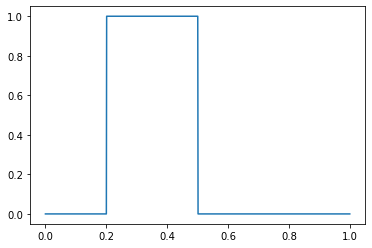

In [15]:
network = simple_network([5, 2], [1, -1], -1)  # Input Weights: 5, 2; Output Weights: 1, -1; Bias: -1
domain = np.arange(0., 1., 0.001)
plt.plot(domain, network(domain))
plt.show()

By adjusting the weights of the network, we can change both the width and the height of the rectangle function (even making the height negative): 

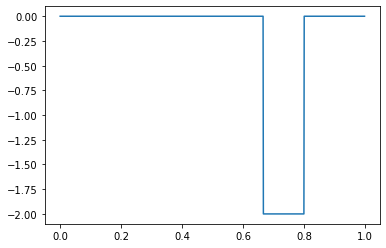

In [16]:
network = simple_network([3 / 2, 5 / 4], [-2, 2], -1)  # Input Weights: 3/2, 5/4; Output Weights: -2, 2; Bias: -1
domain = np.arange(0., 1., 0.001)
plt.plot(domain, network(domain))
plt.show()

Suppose we add two additional neurons to the hidden layer. Since the weights connecting these neurons to the input and output neurons are independent of the weights connecting the first two hidden neurons to the input and output neurons, we can now adjust the weights in the network to produce not just one but *two* rectangular step functions:
 

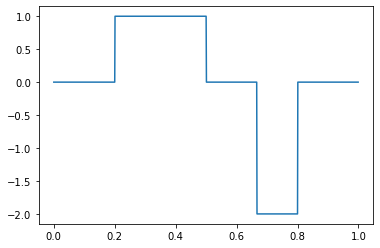

In [13]:
network = simple_network([5, 2, 3 / 2, 5 / 4], [1, -1, -2, 2], -1)
domain = np.arange(0., 1., 0.001)
plt.plot(domain, network(domain))
plt.show()

By adding more and more hidden neurons to the network, we can generate more and more rectangular step functions, and, in this way, we can shape the output of the network to fit any continuous function we like:

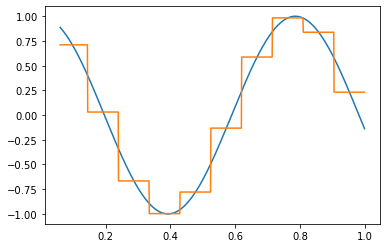

In [14]:
def approximate_function(func, hidden_size):
    rectangle_number = int(hidden_size / 2)
    rectangle_width = 0.95 / rectangle_number
    start = 0.05
    weights_from_input = [] 
    weights_to_output = []
    
    for rect in range(rectangle_number):
        end = start + rectangle_width
        weights_from_input += [(1 / start), (1 / end)]
        weights_to_output += [func((start + end) / 2), -(func((start + end) / 2))]
        start = end
        
    network = simple_network(weights_from_input, weights_to_output, -1)
    domain = np.arange(0.06, 1., 0.001)
    plt.plot(domain, func(domain))
    plt.plot(domain, network(domain))
    plt.show()

approximate_function(lambda x: np.cos(8 * x), 20)

Thus, by adding just one hidden layer of neurons in a neural network, we can approximate any functional relationship that might obtain between the input and output variables. How close an approximation we can get depends on the number of neurons in the hidden layer. (This result straightforwardly generalizes to the case in which the input and output layers of the network consist of more than one neuron.) In this sense a 2-layer neural network is already maximally expressive: it is capable of approximating any continuous function from the inputs to the outputs with arbitrary precision.

So, even neural networks with a simple 2-layer architecture are, in principle, capable of expressing the precise relationship between a pixel map and the numeral depicted in the corresponding image; they are capable of expressing the relationship between a short snippet of a piece of music and the name of the song of which that snippet is a part; they are capable of expressing the relationship between the series of images comprising a movie and the most likely rating that that movie will be given by the critics. They are, in principle, capable of doing all of these things. But then what advantage is to be gained by considering a so-called "deep" neural network with several hidden layers of neurons as opposed to just one?   

### Why Go Deep? 

As we have just seen, adding depth (as opposed to breadth) to a neural network does not increase the networks's expressiveness. With even one layer of (possibly many) hidden neurons we can already approximate, with arbitrary precision, any continuous function from the inputs to the outputs. So, why is the machine learning paradigm dubbed "deep learning" (which consists in the training of deep neural networks with many layers of hidden neurons) all the rage? (GPT-3, OpenAI's new language processing neural network, contains, e.g., 96 layers) The short answer is that deep neural networks are exponentially more efficient than their broad counterparts at discerning certain kinds of functional relationships in the data. In particular, the hierarchical architecture of deep neural networks allows them to very quickly and efficiently identify functions which have a *compositional* structure. For example, a function which can be expressed in the following form:

$$
f(x_1, \ldots , x_8) = g_1(g_{2}(g_{3}(x_1, x_2), g_{4}(x_3, x_4)), g_{5}(g_{6}(x_5, x_6), g_{7}(x_7, x_8)))
$$

where $g_1,\ldots,g_7$ are all continuous functions in two variables, can be approximated much more efficiently by a 3-layer than by a 2-layer neural network. Thus, the architecture of a deep neural network does not make it more expressive, but instead imposes structural constraints on the way in which it learns from the data. These constraints bias it in favor of searching for deeply compositional patterns in the data.

Consider again the specific case of identifying the numerals depicted in handwritten images. Intuitively this task can be broken up into a number of smaller tasks, like identifying circles, lines, curves, and a variety of other shapes which comprise various parts of the depicted numeral, and then a separate task performed on the output of each of these sub-tasks, which ascertains whether those shapes stand in a certain geometrical relationship to one another. The identification of a circle can probably itself be broken down into a number of local subtasks as well, and those can perhaps be further broken down. To the extent to which the task of identifying a numeral depicted in a handwritten image has this hierarchical structure, a deep neural network is much better suited to efficiently learn to perform this task. At some level, this decomposition of the task into sub-tasks is what was being done in the neural network that we designed with just one hidden-layer of neurons.    

,Index,Values
0,6,0.239833
1,7,0.004029
2,5,-0.000046
3,1,-0.001825
4,9,-0.005242
5,3,-0.006882
6,0,-0.022923
7,4,-0.023018
8,8,-0.040625
9,2,-0.053895


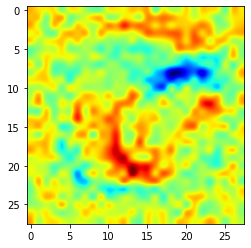

In [18]:
weights_01 = weights[0]
weights_12 = weights[1]

weight_maps = [[] for i in range(hidden_layer_size)]
for number in range(hidden_layer_size):
    for px in range(784):
        weight_maps[number].append(weights_01[px][number])
        
weight_maps = [np.array(weight_maps[i]) for i in range(hidden_layer_size)] # IGNORE THIS LINE

def display_correlation_map(number):
    """Display the weights connecting the input neurons to a specific output neuron as a correlational heat map"""
    correlation_map = np.array([weight_maps[number][i * 28: (i + 1) * 28] for i in range(28)])
    plt.imshow(correlation_map, interpolation='catrom', cmap='jet')
    maxargs = weights_12[number].argsort()[::-1].tolist()
    values = [weights_12[number][arg] for arg in maxargs]
    d = pd.DataFrame({'Index': maxargs, 'Values': values}, index=None)
    display(d)
    
display_correlation_map(9)

Of course, taking note of all of this, still leaves us with an open question, namely: why is that so many of the tasks which we naturally seek to perform using AI systems correspond to algorithms that are deeply compositional, i.e., algorithms that can be broken up into sub-algorithms, which, in turn, can be broken up into sub-algorithms, etc., each of which is operating in a locally autonomous way? We will return to this question later on in the course. 

## Optimization Techniques for Neural Networks

### The Problem of Overfitting

As we have seen, even neural networks with a very simple architecture are highly expressive. Even a neural network with just one hidden layer of neurons, is able to approximate any continuous function from the inputs to the outputs. Moreover, this approximation can be made arbitrarily precise simply by adding additional neurons to the hidden layer. Thus, unlike the simple perceptrons that were the first attempt to model neural architectures in a computational setting, the limitations of modern neural networks do not derive from their lack of expressiveness. There is no corresponding XOR problem to overcome. Nevertheless, neural networks are subject to another set of constraints that limit their ability to efficiently discern generalizable patterns in the data. 

With respect to a neural network, the problem of optimization is the problem of maximizing the predictive accuracy of the network relative to the quality and the quantity of the data on which it is allowed to train. More optimal networks are those which will be able to discern a generalizable pattern even from an analysis of a noisy and small dataset. A suboptimal network will require a much larger and less noisy dataset to be able to see just what is going on. But why exactly is there a tradeoff between, say, the size of the dataset on which a neural network is allowed to train and the accuracy of the predictions made by the trained network? 

To examine this question in a little more detail, let's return to the example of the 2-layer neural network that we constructed to identify the numerals depicted in the handwritten images in the MNIST dataset. In that case, the training dataset comprised $55,000$ images, and by training the network on this data, we were able to train the network to predict digits with an accuracy of approximately $93\%$. Now, what if instead of $55,000$ images, we had fewer images in the training dataset, say, $1500$. Could we simulate the larger dataset just by updating the network many, many more times on this smaller set of images? Let's find out:  


In [19]:
from keras.models import Sequential
from keras.layers import Dense

mnist_network = Sequential()

# Construct the Neural Network's Architecture
mnist_network.add(Dense(784))
mnist_network.add(Dense(40, activation='relu'))
mnist_network.add(Dense(10))

In [ ]:
mnist_network.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
log = mnist_network.fit(training_images[:3000], training_targets[:3000], validation_split=0.5, epochs=100)

<function matplotlib.pyplot.show(close=None, block=None)>

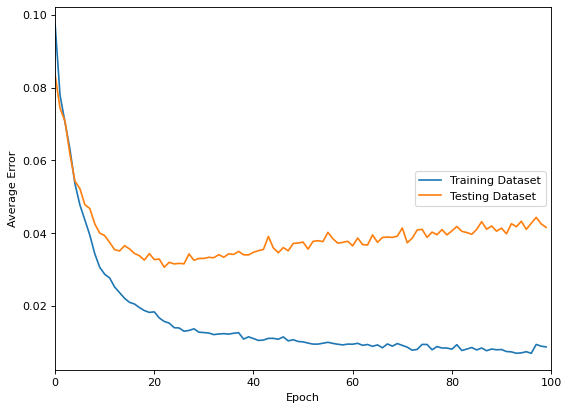

In [19]:
fig, axes = plt.subplots(figsize=(8, 6), dpi=80)
axes.set_xlim(0, 100)
#axes.set_ylim(0.03, 0.05)
axes.set_xlabel('Epoch')
axes.set_ylabel('Average Error')
# plot line
axes.plot(log.history['loss'], label='Training Dataset')
axes.plot(log.history['val_loss'], label='Testing Dataset')
axes.legend(loc="center right")
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

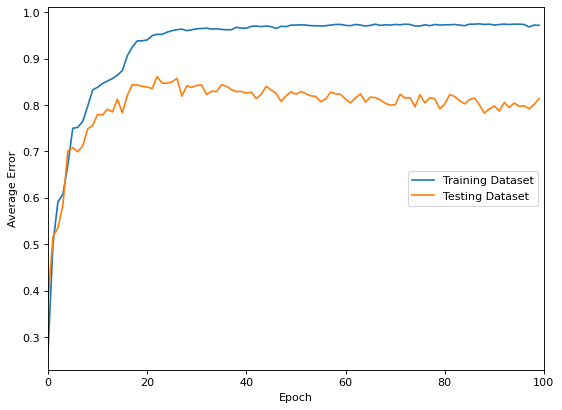

In [20]:
fig, axes = plt.subplots(figsize=(8, 6), dpi=80)
axes.set_xlim(0, 100)
#axes.set_ylim(0.03, 0.05)
axes.set_xlabel('Epoch')
axes.set_ylabel('Average Error')
axes.plot(log.history['accuracy'], label='Training Dataset')
axes.plot(log.history['val_accuracy'], label='Testing Dataset')
axes.legend(loc="center right")
plt.show 

Notice that, as we train the network, the error ("loss") goes down and the accuracy ("acc") goes up on the training dataset. However, on the testing dataset, both the error ("val_loss") and the accuracy ("val_acc") eventually level off and even start to go in the wrong direction:

What exactly is happening here? Why does the network's performance on the training and the testing datasets increasingly diverge the longer we train the network? In formal terms, the answer is that the gradient descent algorithm is moving towards a point in the internal state space of the network that is a local minimum in the error function relative to the training dataset, but is not a local minimum in the error function relative to the testing dataset. In informal terms, the neural network has started to 'memorize' the training data and is no longer generalizing from it. The differential improvement in accuracy relative to the training dataset means that the network is learning features of that specific dataset that do not apply to the testing dataset. In the language of neural network optimization (borrowed from the language of statistical regression), the network is 'overfitting' the data.  

Since neural networks are so expressive, they are capable of formulating highly specialized local solutions to the problem of making sense of the specific data that they are given. In a sense, they are too clever for their own good. Suppose I trained a neural network repeatedly on the first four values of a function:

$$
f(1) = 2\\
f(2) = 4\\
f(3) = 8\\
f(4) = 16
$$

and then asked it to predict the value $f(5)$. We might expect it to predict $f(5)=32$ (and, more generally, to identify the underlying function as $f(n)=2^n$). But the neural network can express all sorts of patterns which can make sense of this specific data wnich do not generalize in this way. The pattern might be something simple like:
$$
f(n) = \left\{\begin{array}{ll} 2^n & \textrm{if }n\leq 4\\
                                174 & \textrm{otherwise} \end{array}\right.
$$
Or it might be something clever like: place $n+2$ points on a circle and join them all with lines; $f(n)$ is the number of regions into which the circle is divided (you can check for yourself that, in this case, $f(n)=2^n$ for $n=1,2,3,4$ but $f(5)=31$, not $32$). Each of these patterns can be encoded by the internal state of a neural network and each of the corresponding points in the internal state space of the network is a local minimum of the error function with respect to the training dataset. How then do we make ensure that, in employing the method of gradient descent, the neural network doesn't come to rest at such a bad (because idiosyncratic) minimum? How, in other words, do we make sure that the network is not simply memorizing the data (perhaps using a very clever, general mnemomic) as opposed to generalizing from it in the correct way? (Hint: Note the connection to the philosophical problem of induction.)

### Regularization

There are two general approaches to trying to address the problem of overfitting in a neural network. The first is to design the underlying architecture of the network so as to bias it in the direction of interesting and generalizable local minima. Recall that the architecture of a network is what determines its propagation algorithm, and this propagation algorithm (combined with an error function) is what determines the error map of the internal state space of the network. If we choose the architecture of the network correctly, we can shift around this error map, thereby making it much more difficult for gradient descent to lead us to settle on an undesirable minima. We have already seen an example of this sort of tactic, when we considered why neural networks are often designed with several (as opposed to just a few) hidden layers of neurons. This network depth biases the error map in favor of functional relationships with a deeply compositional structure, and, as it turns out, across a wide variety of machine learning tasks, this sort of relationship tends to generalize very well. Thus, deep neural networks are less prone to overfitting than their shallow counterparts.

The second approach to the problem of overfitting is more methodological than it is substantive. It focuses more on the design of the training algorithm than on the architecture of the network. This second approach is guided by the following thought: if we want the network to generalize from the training dataset and not just memorize it, we should modify the training algorithm in such a way that the task of memorizing the data is made more difficult. The technique of modifying a network's training algorithm to make it harder to overfit the data is referred to, in the deep learning literature, as *regularization*. The two most obvious ways to regularize the training of a neural network are:

1. *Increase the amount of data that the network trains on.* The larger the dataset, the harder it is to come up with a specialized solution that can make sense of it. 
2. *Decrease the amount of time that the network is allowed to train on the data.* The shorter the amount of time that the network is allowed to train, the less time the network has to come up with a specialized solution. 

The second of these two techniques is often implemented as follows. During the training of the network, we keep a running track of the performance of the network on both the training dataset and a separate disjoint dataset (often referred to as the 'validation' dataset). Once the network's performance on the validation set flatlines, or starts to degrade, we halt the training.  

Besides the two regularization techniques described above, there is a third technique that is also worth mentioning. This technique is called 'dropout training'. The idea behind dropout training is very simple. At each step of the training of the network, we set a random assortment of neurons in the network to have a value of zero. This has the effect that the weights of the links from those neurons will not be updated during that step of the training. On the next step, we will choose a different random assortment of neurons in the network to set to zero, update the network, and continue in this way. Dropout training essentially has the effect of only allowing a certain portion of the network to train on the data at each step. This makes it difficult for the neurons in the network to coordinate with one another to formulate more intricate solutions to the problem of making sense of the data. As one article on the topic puts it:

> Dropout (Srivastave et al., 2014) may be the first instance of a human curated artisinal regularization technique that entered wide scale use in machine learning. Dropout, simply described, is the concept that if you can learn how to do a task repeatedly whilst drunk, you should be able to do the task even better when sober. This insight has resulted in numerous state of the art results and a nascent field dedicated to preventing dropout from being used on neural networks.

In [27]:
from keras.layers import Dropout

mnist_network_wd = Sequential()

# Construct the Neural Network's Architecture
mnist_network_wd.add(Dense(784))
mnist_network_wd.add(Dense(40, activation='relu'))
mnist_network_wd.add(Dropout(0.2))
mnist_network_wd.add(Dense(10))

In [ ]:
mnist_network_wd.compile(optimizer='adam', loss='mean_squared_error',  metrics=['accuracy'])
log_wd = mnist_network_wd.fit(training_images[:3000], training_targets[:3000], validation_split=0.5, epochs=100)

<function matplotlib.pyplot.show(close=None, block=None)>

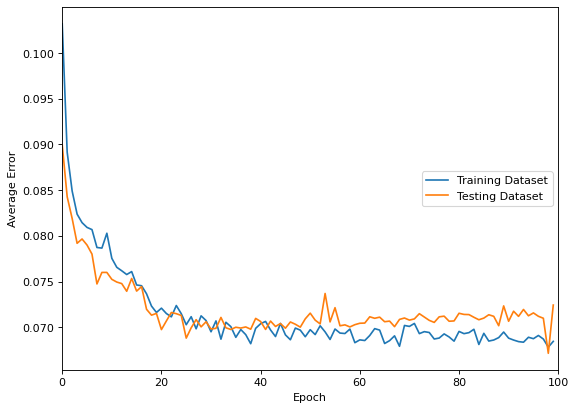

In [29]:
# summarize history for accuracy
fig, axes = plt.subplots(figsize=(8, 6), dpi=80)
axes.set_xlim(0, 100)
#axes.set_ylim(0.03, 0.05)
axes.set_xlabel('Epoch')
axes.set_ylabel('Average Error')
# plot line
axes.plot(log_wd.history['loss'], label='Training Dataset')
axes.plot(log_wd.history['val_loss'], label='Testing Dataset')
axes.legend(loc="center right")
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

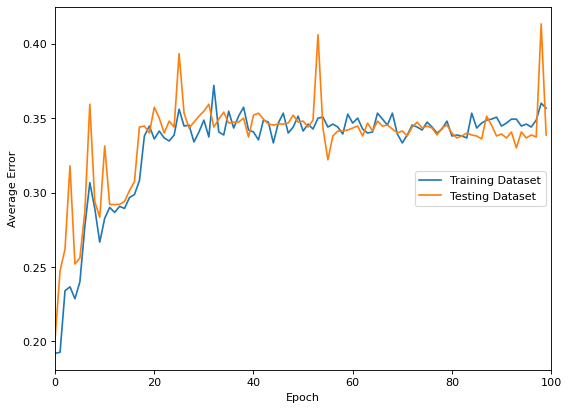

In [30]:
fig, axes = plt.subplots(figsize=(8, 6), dpi=80)
axes.set_xlim(0, 100)
#axes.set_ylim(0.03, 0.05)
axes.set_xlabel('Epoch')
axes.set_ylabel('Average Error')
axes.plot(log_wd.history['accuracy'], label='Training Dataset')
axes.plot(log_wd.history['val_accuracy'], label='Testing Dataset')
axes.legend(loc="center right")
plt.show 

## Some Final Demonstrations

### A Deep Neural Network for Recognizing Handwritten Numerals

In [31]:
from keras.models import Sequential
from keras.layers import Dense

deep_mnist_network = Sequential()

# Construct the Neural Network's Architecture
deep_mnist_network.add(Dense(784))
for i in range(5):
    deep_mnist_network.add(Dense(40, activation='relu'))  # 5 Hidden Layers
deep_mnist_network.add(Dense(10))

In [ ]:
deep_mnist_network.compile(optimizer='adam', loss='mean_squared_error')
# Train the Neural Network - THIS TAKES A LONG TIME (after first run, comment out the code in this cell and uncomment the code in the following cell)
deep_mnist_network.fit(training_images, training_targets, epochs=5)
deep_mnist_network.save("../assets/data/trained-networks/deep_mnist_network")

In [32]:
# deep_mnist_network = keras.models.load_model("../assets/data/trained-networks/deep_mnist_network")

In [32]:
def deep_network(inputs):
    outputs = deep_mnist_network(inputs, training=False)[0]
    return outputs

test_mnist_network(deep_network)

The neural network identified 9630/10000 (96.3%) of the images correctly.


### A Convolutional Neural Network for Recognizing Handwritten Numerals

In [33]:
from keras.utils import to_categorical
from keras.layers import Conv2D, Flatten

mnist_training_images = mnist_training_images.reshape(60000, 28, 28, 1)
mnist_training_targets = to_categorical(training_labels)
mnist_testing_images = mnist_testing_images.reshape(10000, 28, 28, 1)
mnist_testing_targets = to_categorical(testing_labels)

conv_mnist_network = Sequential()
conv_mnist_network.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
conv_mnist_network.add(Conv2D(32, kernel_size=3, activation='relu'))
conv_mnist_network.add(Flatten())
conv_mnist_network.add(Dense(10, activation='softmax'))

In [ ]:
conv_mnist_network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the Neural Network - THIS TAKES A LONG TIME (after first run, comment out the code in this cell and uncomment the code in the following cell)
conv_mnist_network.fit(mnist_training_images, mnist_training_targets, epochs=3)
conv_mnist_network.save("../assets/data/trained-networks/conv_mnist_network")

In [35]:
# conv_mnist_network = keras.models.load_model("../assets/data/trained-networks/conv_mnist_network")

In [35]:
mnist_testing_images = mnist_testing_images.reshape(10000, 28, 28, 1)
mnist_testing_targets = to_categorical(testing_labels)

def conv_network(inputs):
    outputs = conv_mnist_network(inputs, training=False).numpy()[0]
    return outputs


def test_conv_mnist_network(network):
    # Total number of correct ids
    correct = 0 
    for i in range(len(mnist_testing_images)):
        image = mnist_testing_images[[i]]               
        digit = testing_labels[i]
        prediction = identify_digit(network, image)
        # If the neural network correctly ids the digit, add 1 to the number of correct guesses. If not, do nothing.
        if (prediction == digit):
            correct += 1
    
    # Print the results
    print(f"The neural network identified {correct}/10000 ({round((correct / 10000) * 100, 2)}%) of the images correctly.") 
    
test_conv_mnist_network(conv_network)

The neural network identified 9863/10000 (98.63%) of the images correctly.


## Overview

Here are some of the important points to take away from our discussion of neural networks:

1. Neural networks are information processing systems designed to instantiate an idealized model of neural architecture in a computational setting. They consist of neurons that are connected to one another by weighted links. 

2. The architecture of the network and its internal state parameters (e.g., the weights of its neural links) determine how information flows through the network. This information flow is modeled by propagating numerical values assigned to the neurons in the input layer through the network to the neurons in the output layer.

3. Neural networks 'learn' by adjusting their internal state parameters in response to data. One standard method for the training of a neural network is the method of gradient descent, whereby the internal state of the network is adjusted to minimize the deviation of the network's output from a prescribed target value.

4. Neural networks provide one paradigm for machine learning. In machine learning applications, instead of writing a program instructing a computer how to carry out a certain task that we would like it to perform, we write a program instructing the computer how to *learn* to perform that task for itself. Insofar as learning to perform a task on one's own is considered an exercise of intelligence, machine learning may be viewed as a branch of AI.

5. While the earliest neural networks were very limited in terms of what patterns in the data they could express, modern neural networks with even a simple architecture are vastly more expressive than their earlier counterparts. In fact, a 2-layer neural network is already capable of approximating a continuous function to any arbitrary degree of precision. Significant advances were needed in order to develop efficient training algorithms for these more expressive networks. The development of such algorithms is largely responsible for the recent resurgence of interest in neural networks.  

6. On the one hand, the expressiveness of neural networks allows them to be applied to a wide variety of machine learning tasks. On the other hand, it makes neural networks susceptible to the problem of overfitting. The two main techniques for addressing the problem of overfitting are:
 - Modifications to the architecture of the network that bias it in favor of certain functional forms (e.g., deep neural networks, convolutional neural networks)
 - Regularization of the training algorithm in order to make it more difficult for the network to memorize the data (e.g., deliberate halting of the training process, dropout training)